In [6]:
! pip uninstall torchaudio torchvision --y

! pip uninstall torch --y
! pip install torch==2.4
! pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
! pip install torch-geometric
! pip install scikit-learn
! pip install matplotlib

import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)

Found existing installation: torchaudio 2.5.1+cu121
Uninstalling torchaudio-2.5.1+cu121:
  Successfully uninstalled torchaudio-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in links: https://data.pyg.org/whl/torch-2.4.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 986.2/986.2 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.9 MB/s eta 0:00:00
2.5.1+cu121
True
12.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import torch

events = pd.read_csv('/content/drive/MyDrive/Data and info/light/data/PHEME/raw/events.csv')
users = pd.read_csv('/content/drive/MyDrive/Data and info/light/data/PHEME/raw/users.csv')
tweets = pd.read_csv('/content/drive/MyDrive/Data and info/light/data/PHEME/raw/tweets.csv')
related_to = pd.read_csv('/content/drive/MyDrive/Data and info/light/data/PHEME/raw/tweet_event_relationships.csv')

replied_to = pd.read_csv('/content/drive/MyDrive/Data and info/light/data/PHEME/raw/tweet_tweet_relationships.csv')
wrote = pd.read_csv('/content/drive/MyDrive/Data and info/light/data/PHEME/raw/user_tweet_relationships.csv')

In [ ]:
replied_to.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97912 entries, 0 to 97911
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   relationship_id    97912 non-null  int64 
 1   relationship_type  97912 non-null  object
 2   start_tweet_id     97912 non-null  int64 
 3   end_tweet_id       97912 non-null  int64 
 4   timestamp          97912 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.7+ MB


In [ ]:
# Step 1: Collect all unique IDs across user_id, tweet_id, and event_id
all_ids = pd.Series(pd.concat([users['id'], tweets['id'], events['id']]).unique())

# Step 2: Map each unique ID to a unique integer
id_map = {old_id: new_id for new_id, old_id in enumerate(all_ids)}

# Step 3: Replace IDs in each DataFrame with the unique integer IDs
# For events
events['event_id'] = events['id'].map(id_map)
# For users
users['user_id'] = users['id'].map(id_map)
# For tweets
tweets['tweet_id'] = tweets['id'].map(id_map)

# For relationships, apply the mapping as well
related_to['tweet_id'] = related_to['tweet_id'].map(id_map)
related_to['event_id'] = related_to['event_id'].map(id_map)



replied_to['start_tweet_id'] = replied_to['start_tweet_id'].map(id_map)
replied_to['end_tweet_id'] = replied_to['end_tweet_id'].map(id_map)

wrote['user_id'] = wrote['user_id'].map(id_map)
wrote['tweet_id'] = wrote['tweet_id'].map(id_map)

In [ ]:
# users, user_id
# events, id
# tweets, tweet_id



In [ ]:
# Related to (Tweet -> Event)
related_to_edge_index = torch.tensor([related_to['tweet_id'].values, related_to['event_id'].values])



# Replied to (Tweet -> Tweet)
replied_to_edge_index = torch.tensor([replied_to['start_tweet_id'].values, replied_to['end_tweet_id'].values])

# Wrote (User -> Tweet)
wrote_edge_index = torch.tensor([wrote['user_id'].values, wrote['tweet_id'].values])

<ipython-input-7-623ae1b114e1>:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  related_to_edge_index = torch.tensor([related_to['tweet_id'].values, related_to['event_id'].values])


In [ ]:
print(tweets)

            id annotation       user_id  tweet_id  favorite_count  \
0            1      False  4.725133e+08     74015             0.0   
1            6      False  2.505096e+08     74016             0.0   
2            7      False  3.131990e+08     74017             0.0   
3            8      False  1.307578e+07     74018             1.0   
4            9      False  2.317020e+09     74019             1.0   
...        ...        ...           ...       ...             ...   
105742  179766      False  5.518660e+07    179757            59.0   
105743  179767      False  1.457299e+08    179758             0.0   
105744  179768      False  3.114630e+07    179759             0.0   
105745  179769      False  9.420573e+07    179760             0.0   
105746  179770      False  2.998116e+07    179761             2.0   

                                                     text  retweet_count  
0                                                     yes            0.0  
1                   i

In [ ]:
!pip install torch_geometric

#In use

In [1]:
import os.path as osp
from typing import Callable, Optional
import torch
from torch_geometric.data import InMemoryDataset, TemporalData
import pandas as pd


class PHEME(InMemoryDataset):
    """
    A temporal knowledge graph dataset for the PHEME dataset, which combines
    tweets, events, and user relationships into a single TemporalData object.

    Args:
        root (str): Root directory where the dataset is stored.
        transform (callable, optional): A function/transform that takes in a
            `torch_geometric.data.Data` object and returns a transformed version.
            (default: `None`)
        pre_transform (callable, optional): A function/transform that takes in
            a `torch_geometric.data.Data` object and returns a transformed version.
            (default: `None`)
        force_reload (bool, optional): Whether to re-process the dataset.
            (default: `False`)
    """

    def __init__(
        self,
        root: str,
        transform: Optional[Callable] = None,
        pre_transform: Optional[Callable] = None,
        force_reload: bool = False,
    ) -> None:
        super().__init__(root, transform, pre_transform, force_reload=force_reload)
        self.load(self.processed_paths[0], data_cls=TemporalData)

    @property
    def raw_dir(self) -> str:
        return osp.join(self.root, 'PHEME', 'raw')

    @property
    def processed_dir(self) -> str:
        return osp.join(self.root, 'PHEME', 'processed')

    @property
    def raw_file_names(self) -> list:
        return [
            'events.csv',
            'tweet_event_relationships.csv',
            'tweet_tweet_relationships.csv',
            'tweets.csv',
            'user_tweet_relationships.csv',
            'users.csv'
        ]

    @property
    def processed_file_names(self) -> str:
        return 'data.pt'

    def process(self) -> None:
      # Step 1: Load raw data
      events = pd.read_csv(osp.join(self.raw_dir, 'events.csv'), sep='\t')
      tweet_event_rel = pd.read_csv(osp.join(self.raw_dir, 'tweet_event_relationships.csv'))
      tweet_tweet_rel = pd.read_csv(osp.join(self.raw_dir, 'tweet_tweet_relationships.csv'))
      user_tweet_rel = pd.read_csv(osp.join(self.raw_dir, 'user_tweet_relationships.csv'))

      print(f"Loaded datasets: events={len(events)}, tweet_event_rel={len(tweet_event_rel)}, "
            f"tweet_tweet_rel={len(tweet_tweet_rel)}, user_tweet_rel={len(user_tweet_rel)}")

      # Step 2: Rename columns
      tweet_event_rel = tweet_event_rel.rename(columns={'tweet_id': 'src', 'event_id': 'dst'})
      tweet_tweet_rel = tweet_tweet_rel.rename(columns={'start_tweet_id': 'src', 'end_tweet_id': 'dst', 'timstamp': 'timestamp'})
      user_tweet_rel = user_tweet_rel.rename(columns={'user_id': 'src', 'tweet_id': 'dst'})

      print(f"Columns renamed. Sample tweet_event_rel:\n{tweet_event_rel.head()}")

      # Step 3: Combine relationships
      all_relationships = pd.concat([
          tweet_event_rel.assign(relation_type='RELATED_TO'),
          tweet_tweet_rel.assign(relation_type='REPLIED_TO'),
          user_tweet_rel.assign(relation_type='WROTE')
      ], ignore_index=True)

      print(f"Combined all relationships. Total records: {len(all_relationships)}")
      print(f"Sample combined relationships:\n{all_relationships.head()}")

      # Step 4: Parse timestamps
      all_relationships['timestamp'] = pd.to_datetime(all_relationships['timestamp'], errors='coerce')
      print(f"Parsed timestamps. Missing timestamps: {all_relationships['timestamp'].isna().sum()}")

      # Step 5: Fill missing timestamps
      all_relationships['timestamp'] = all_relationships['timestamp'].fillna(method='bfill')
      missing_indices = all_relationships['timestamp'].isna()
      if missing_indices.any():
          print(f"Warning: {missing_indices.sum()} missing timestamps after filling. Assigning default value.")
          all_relationships.loc[missing_indices, 'timestamp'] = pd.Timestamp('1970-01-01')

      print(f"Timestamps after filling:\n{all_relationships['timestamp'].head()}")

      # Step 6: Convert timestamps to UNIX and PyTorch Long
      all_relationships['timestamp'] = all_relationships['timestamp'].astype('int64') // 10**9
      print(f"Timestamps converted to UNIX format. Sample:\n{all_relationships['timestamp'].head()}")

      # Step 7: Map entities and relations
      entities = pd.concat([all_relationships['src'], all_relationships['dst']]).unique()
      entity_map = {entity: idx for idx, entity in enumerate(entities)}
      all_relationships['src'] = all_relationships['src'].map(entity_map)
      all_relationships['dst'] = all_relationships['dst'].map(entity_map)

      print(f"Mapped entities. Total unique entities: {len(entity_map)}")
      print(f"Sample mapped relationships:\n{all_relationships.head()}")

      relation_types = {'RELATED_TO': 0, 'REPLIED_TO': 1, 'WROTE': 2}
      all_relationships['relation'] = all_relationships['relation_type'].map(relation_types)

      print(f"Mapped relationship types. Sample:\n{all_relationships[['relation_type', 'relation']].drop_duplicates()}")

      # Step 8: Convert to tensors
      src = torch.tensor(all_relationships['src'].values, dtype=torch.long)
      dst = torch.tensor(all_relationships['dst'].values, dtype=torch.long)
      timestamp = torch.tensor(all_relationships['timestamp'].values, dtype=torch.long)
      relation = torch.tensor(all_relationships['relation'].values, dtype=torch.float).view(-1, 1)

      print(f"Converted to tensors. Sample src:\n{src[:5]}")
      print(f"Sample dst:\n{dst[:5]}")
      print(f"Sample timestamps (UNIX, torch.long):\n{timestamp[:5]}")
      print(f"Sample relations:\n{relation[:5]}")

      # Step 9: Create TemporalData object
      data = TemporalData(
          src=src,
          dst=dst,
          t=timestamp,
          msg=relation  # Store relations as messages
      )

      print(f"Created TemporalData. Data object:\n{data}")
      print(f"TemporalData src size: {data.src.size(0)}, dst size: {data.dst.size(0)}, t size: {data.t.size(0)}")

      if self.pre_transform is not None:
          data = self.pre_transform(data)

      # Step 10: Save processed data
      self.save([data], self.processed_paths[0])
      print("Processed data saved successfully.")

    def __repr__(self) -> str:
        return 'PHEME()'


In [3]:
# from pheme_dataset import PHEME

# Specify the root directory for the PHEME dataset
pheme_dataset = PHEME(root='/content/drive/MyDrive/Data and info/light/data')

# Load the processed TemporalData object
data = pheme_dataset[0]



Processing...


Loaded datasets: events=9, tweet_event_rel=104582, tweet_tweet_rel=97912, user_tweet_rel=104582
Columns renamed. Sample tweet_event_rel:
   relationship_id relationship_type    src    dst            timestamp
0            35415        RELATED_TO  21691  21596  2014-11-24T10:37:04
1            35740        RELATED_TO  21901  21596  2014-11-20T21:59:19
2            35739        RELATED_TO  21902  21596  2014-11-23T12:04:09
3            35738        RELATED_TO  21881  21596  2014-11-20T12:51:00
4            35736        RELATED_TO  21903  21596  2014-11-23T12:01:01
Combined all relationships. Total records: 307076
Sample combined relationships:
   relationship_id relationship_type    src    dst            timestamp  \
0            35415        RELATED_TO  21691  21596  2014-11-24T10:37:04   
1            35740        RELATED_TO  21901  21596  2014-11-20T21:59:19   
2            35739        RELATED_TO  21902  21596  2014-11-23T12:04:09   
3            35738        RELATED_TO  21881  21596

<ipython-input-1-2e7126620d66>:90: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_relationships['timestamp'] = all_relationships['timestamp'].fillna(method='bfill')


Mapped entities. Total unique entities: 156349
Sample mapped relationships:
   relationship_id relationship_type  src     dst   timestamp relation_type
0            35415        RELATED_TO    0  155175  1416825424    RELATED_TO
1            35740        RELATED_TO    1  155175  1416520759    RELATED_TO
2            35739        RELATED_TO    2  155175  1416744249    RELATED_TO
3            35738        RELATED_TO    3  155175  1416487860    RELATED_TO
4            35736        RELATED_TO    4  155175  1416744061    RELATED_TO
Mapped relationship types. Sample:
       relation_type  relation
0         RELATED_TO         0
104582    REPLIED_TO         1
202494         WROTE         2
Converted to tensors. Sample src:
tensor([0, 1, 2, 3, 4])
Sample dst:
tensor([155175, 155175, 155175, 155175, 155175])
Sample timestamps (UNIX, torch.long):
tensor([1416825424, 1416520759, 1416744249, 1416487860, 1416744061])
Sample relations:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [

Done!


In [4]:
# Inspect data
print(data)

TemporalData(src=[307076], dst=[307076], t=[307076], msg=[307076, 1])


In [5]:
data = pheme_dataset[0]  # Access the single TemporalData object

# Calculate statistics based on the TemporalData object directly
num_events = data.src.size(0)
unique_src_nodes = set(data.src.tolist())
unique_dst_nodes = set(data.dst.tolist())

# Handling relations in the 'msg' field
# Check if `msg` contains a list of lists or tensors
if isinstance(data.msg[0], torch.Tensor):
    # If `msg` contains tensors (like one-hot vectors), we can use argmax to get the index
    unique_relations = set([relation.argmax().item() for relation in data.msg])  # Get the index of the max value in the tensor
else:
    # If `msg` contains scalar values (such as indices), we can directly convert to a set
    unique_relations = set(data.msg.tolist())

# Handle timestamps in the 't' field
unique_timestamps = set(data.t.tolist())  # t represents the timestamps
unique_nodes = unique_src_nodes.union(unique_dst_nodes)
num_nodes = len(unique_nodes)

# Print dataset statistics
print("\nDataset Statistics:")
print(f"Number of events (triples): {num_events}")
print(f"Number of unique nodes: {num_nodes}")
print(f"Number of unique source nodes: {len(unique_src_nodes)}")
print(f"Number of unique destination nodes: {len(unique_dst_nodes)}")
print(f"Number of unique relations: {len(unique_relations)}")
print(f"Number of unique timestamps: {len(unique_timestamps)}")


Dataset Statistics:
Number of events (triples): 307076
Number of unique nodes: 156349
Number of unique source nodes: 155175
Number of unique destination nodes: 105756
Number of unique relations: 1
Number of unique timestamps: 90530


In [6]:
print(f"Timestamps range: {data.t.min().item()} to {data.t.max().item()}")
print(f"Unique timestamps: {len(set(data.t.tolist()))}")


Timestamps range: 1407623586 to 1427919135
Unique timestamps: 90530


In [7]:
# Print some statistics and raw values to understand the data distribution
print("Timestamps Statistics:")
print(f"Minimum timestamp: {data.t.min().item()}")  # Access the 't' attribute for timestamps and use .item() to get the scalar value
print(f"Maximum timestamp: {data.t.max().item()}")  # Access the 't' attribute for timestamps and use .item() to get the scalar value
print(f"Example timestamps: {data.t[:10].tolist()}")  # Print the first 10 timestamp values as a list

Timestamps Statistics:
Minimum timestamp: 1407623586
Maximum timestamp: 1427919135
Example timestamps: [1416825424, 1416520759, 1416744249, 1416487860, 1416744061, 1416728836, 1416681917, 1416583990, 1416826762, 1416496528]


In [8]:
# Print some statistics and raw values to understand the data distribution
print("Timestamps Statistics:")

# Ensure timestamps exist in the TemporalData object
if hasattr(data, 't') and data.t is not None:
    timestamps = data.t  # Access the timestamp tensor
    print(f"Minimum timestamp: {timestamps.min().item()}")
    print(f"Maximum timestamp: {timestamps.max().item()}")
    print(f"Example timestamps: {timestamps[:10].tolist()}")  # First 10 timestamps
else:
    print("No timestamps available in the data.")


Timestamps Statistics:
Minimum timestamp: 1407623586
Maximum timestamp: 1427919135
Example timestamps: [1416825424, 1416520759, 1416744249, 1416487860, 1416744061, 1416728836, 1416681917, 1416583990, 1416826762, 1416496528]


/usr/local/lib/python3.10/dist-packages/torch/_compile.py:31: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/issues/40967 for more information
  return disable_fn(*args, **kwargs)


Epoch :01
Training Loss: 1.8429
Validation Loss: 2.5062
Validation AP: 0.4589, Validation AUC: 0.4637, Validation MRR: 0.7318
Test AP: 0.4818, Test AUC: 0.3856, Test MRR: 0.6936
Epoch 1 completed in 895.37s
Epoch :02
Training Loss: 1.8363
Validation Loss: 3.2959
Validation AP: 0.4319, Validation AUC: 0.3635, Validation MRR: 0.6817
Test AP: 0.6918, Test AUC: 0.7613, Test MRR: 0.8802
Epoch 2 completed in 900.29s
Epoch :03
Training Loss: 1.6874
Validation Loss: 2.5029
Validation AP: 0.5441, Validation AUC: 0.5631, Validation MRR: 0.7806
Test AP: 0.4642, Test AUC: 0.3485, Test MRR: 0.6748
Epoch 3 completed in 898.50s
Epoch :04
Training Loss: 1.6150
Validation Loss: 2.3682
Validation AP: 0.6294, Validation AUC: 0.6377, Validation MRR: 0.8189
Test AP: 0.4781, Test AUC: 0.3877, Test MRR: 0.6947
Epoch 4 completed in 895.95s
Epoch :05
Training Loss: 1.5946
Validation Loss: 2.4536
Validation AP: 0.4687, Validation AUC: 0.4588, Validation MRR: 0.7292
Test AP: 0.4658, Test AUC: 0.3965, Test MRR: 0

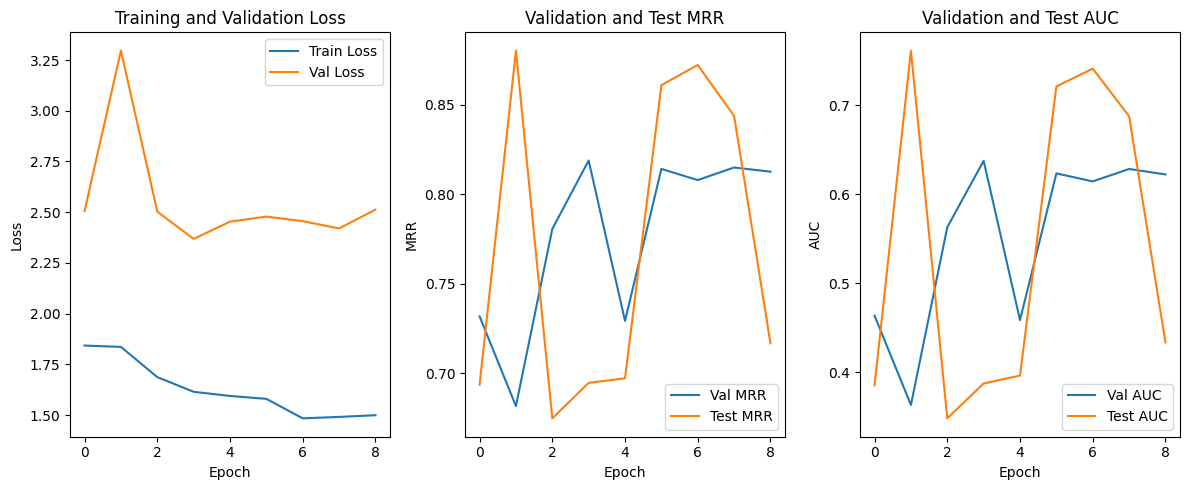

In [9]:
# parallel graph pooling with fusion layer
import torch

import os.path as osp
from sklearn.metrics import average_precision_score, roc_auc_score
from torch.nn import Linear
import torch.nn.functional as F

from torch_geometric.datasets import JODIEDataset
from torch_geometric.loader import TemporalDataLoader
from torch_geometric.nn import TGNMemory, TransformerConv, GCNConv
from torch_geometric.nn.dense import dense_diff_pool
from torch_geometric.utils import to_dense_adj, to_dense_batch
from torch_geometric.nn.models.tgn import IdentityMessage, LastAggregator, LastNeighborLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Path and dataset setup

data = pheme_dataset[0].to(device)

# Split dataset into train/val/test
train_data, val_data, test_data = data.train_val_test_split(val_ratio=0.15, test_ratio=0.15)

# Initialize data loaders
train_loader = TemporalDataLoader(train_data, batch_size=200, neg_sampling_ratio=1.0)
val_loader = TemporalDataLoader(val_data, batch_size=200, neg_sampling_ratio=1.0)
test_loader = TemporalDataLoader(test_data, batch_size=200, neg_sampling_ratio=1.0)

# Initialize neighbor loader
neighbor_loader = LastNeighborLoader(data.num_nodes, size=10, device=device)



# Utility function for optional debugging output
def debug_shapes(**shapes):
    for name, value in shapes.items():
        print(f"{name} shape: {value.shape}")


class DiffPoolLayer(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, num_nodes, ratio=0.25):
        super().__init__()
        self.num_clusters = max(1, int(ratio * num_nodes))
        self.gnn_embed = GCNConv(in_channels, hidden_channels)
        self.gnn_pool = GCNConv(in_channels, self.num_clusters)

    def forward(self, x, edge_index, batch, debug=False):
        embed = self.gnn_embed(x, edge_index)
        s = self.gnn_pool(x, edge_index).softmax(dim=-1)

        # Convert to dense batch
        x, mask = to_dense_batch(embed, batch)
        adj = to_dense_adj(edge_index, batch)
        s, _ = to_dense_batch(s, batch)

        if debug:
            debug_shapes(x=x, adj=adj, s=s)

        # Differential pooling
        x, adj, link_loss, ent_loss = dense_diff_pool(x, adj, s, mask, normalize=True)
        x = x.view(-1, x.size(-1))  # Flatten the output if necessary

        return x, adj, link_loss, ent_loss


class GraphAttentionEmbedding(torch.nn.Module):
    def __init__(self, in_channels, out_channels, msg_dim, time_enc):
        super().__init__()
        self.time_enc = time_enc
        edge_dim = msg_dim + time_enc.out_channels
        self.conv = TransformerConv(in_channels, out_channels // 2, heads=2, dropout=0.1, edge_dim=edge_dim)

    def forward(self, x, last_update, edge_index, t, msg):
        rel_t = last_update[edge_index[0]] - t
        rel_t_enc = self.time_enc(rel_t.to(x.dtype))
        edge_attr = torch.cat([rel_t_enc, msg], dim=-1)
        return self.conv(x, edge_index, edge_attr)


class FeatureFusion(torch.nn.Module):
    def __init__(self, tgn_dim, diffpool_dim, output_dim):
        super().__init__()
        self.tgn_projection = Linear(tgn_dim, output_dim)
        self.diffpool_projection = Linear(diffpool_dim, output_dim)
        self.attention = torch.nn.MultiheadAttention(embed_dim=output_dim, num_heads=4, batch_first=True)
        self.final_projection = Linear(output_dim, output_dim)

    def forward(self, tgn_features, diffpool_features):
        tgn_proj = self.tgn_projection(tgn_features)
        diffpool_proj = self.diffpool_projection(diffpool_features)
        diffpool_proj = F.interpolate(diffpool_proj.unsqueeze(0).unsqueeze(0),
                                      size=(tgn_proj.size(0), diffpool_proj.size(1)),
                                      mode='bilinear', align_corners=False).squeeze(0).squeeze(0)
        combined = tgn_proj + diffpool_proj
        attended, _ = self.attention(combined.unsqueeze(0), combined.unsqueeze(0), combined.unsqueeze(0))
        return self.final_projection(attended.squeeze(0))


class LinkPredictor(torch.nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.lin_src = Linear(in_channels, in_channels)
        self.lin_dst = Linear(in_channels, in_channels)
        self.lin_final = Linear(in_channels, 1)

    def forward(self, z_src, z_dst):
        h = (self.lin_src(z_src) * self.lin_dst(z_dst)).relu()
        return self.lin_final(h)


# Model dimensions
memory_dim = time_dim = embedding_dim = 100
hidden_dim = 64
final_dim = 128

# Initialize models
memory = TGNMemory(data.num_nodes, data.msg.size(-1), memory_dim, time_dim,
                   message_module=IdentityMessage(data.msg.size(-1), memory_dim, time_dim),
                   aggregator_module=LastAggregator()).to(device)
gnn = GraphAttentionEmbedding(memory_dim, embedding_dim, data.msg.size(-1), memory.time_enc).to(device)
diffpool = DiffPoolLayer(memory_dim, hidden_dim, data.num_nodes).to(device)
fusion = FeatureFusion(embedding_dim, hidden_dim, final_dim).to(device)
link_pred = LinkPredictor(final_dim).to(device)

# Optimizer and loss function
optimizer = torch.optim.Adam(list(memory.parameters()) + list(gnn.parameters()) + list(diffpool.parameters()) +
                             list(fusion.parameters()) + list(link_pred.parameters()), lr=0.0001)
criterion = torch.nn.BCEWithLogitsLoss()

# Helper vector for node mapping
assoc = torch.empty(data.num_nodes, dtype=torch.long, device=device)


def process_batch(batch, debug=False):
    n_id, edge_index, e_id = neighbor_loader(batch.n_id)

    # debug_shapes(n_id=n_id, edge_index=edge_index, e_id=e_id)


    assoc[n_id] = torch.arange(n_id.size(0), device=device)
    batch_vector = torch.zeros(n_id.size(0), dtype=torch.long, device=device)

    # TGN embedding
    z, last_update = memory(n_id)
    z_tgn = gnn(z, last_update, edge_index, data.t[e_id].to(device), data.msg[e_id].to(device))

    # DiffPool embedding
    z_diffpool, adj_diffpool, link_loss, ent_loss = diffpool(z, edge_index, batch_vector, debug=debug)

    # Fuse features
    z_combined = fusion(z_tgn, z_diffpool)
    return z_combined, link_loss, ent_loss


def train_epoch():
    memory.train(), gnn.train(), diffpool.train(), fusion.train(), link_pred.train()
    memory.reset_state(), neighbor_loader.reset_state()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()
        batch = batch.to(device)

        z_combined, link_loss, ent_loss = process_batch(batch, debug=False)
        pos_out = link_pred(z_combined[assoc[batch.src]], z_combined[assoc[batch.dst]])
        neg_out = link_pred(z_combined[assoc[batch.src]], z_combined[assoc[batch.neg_dst]])

        loss = criterion(pos_out, torch.ones_like(pos_out))
        loss += criterion(neg_out, torch.zeros_like(neg_out))
        loss += 0.1 * (link_loss + ent_loss)

        memory.update_state(batch.src, batch.dst, batch.t, batch.msg)
        neighbor_loader.insert(batch.src, batch.dst)

        loss.backward()
        optimizer.step()
        memory.detach()
        total_loss += float(loss) * batch.num_events

    return total_loss / train_data.num_events

def calculate_mrr(pos_score, neg_score):
    """
    Calculate Mean Reciprocal Rank (MRR) for a batch of queries.
    Args:
        pos_score: Tensor of shape [batch_size, 1], scores for positive examples.
        neg_score: Tensor of shape [batch_size, num_negatives], scores for negative examples.
    Returns:
        MRR score (float)
    """
    # Validate input shapes
    if pos_score.size(0) != neg_score.size(0):
        raise ValueError("pos_score and neg_score must have the same batch size.")

    # Combine positive and negative scores for ranking
    scores = torch.cat([pos_score, neg_score], dim=1)  # Shape: [batch_size, 1 + num_negatives]

    # Create binary labels (1 for positive, 0 for negatives)
    labels = torch.zeros_like(scores)
    labels[:, 0] = 1  # First column contains positive scores

    # Sort scores in descending order and get indices
    _, indices = scores.sort(dim=1, descending=True)

    # Get ranks of positive samples
    positive_indices = indices == 0  # Locate positive samples in sorted indices
    ranks = (positive_indices.nonzero(as_tuple=False)[:, 1] + 1).float()  # 1-based rank

    # Calculate MRR
    mrr = (1.0 / ranks).mean()

    return mrr.item()



@torch.no_grad()
def evaluate(loader):
    memory.eval(), gnn.eval(), diffpool.eval(), fusion.eval(), link_pred.eval()
    torch.manual_seed(12345)

    aps, aucs, mrrs = [], [], []
    total_loss = 0
    total_events = 0

    with torch.no_grad():  # Add this to prevent gradient computation during evaluation
        for batch in loader:
            batch = batch.to(device)

            z_combined, link_loss, ent_loss = process_batch(batch, debug=False)
            pos_out = link_pred(z_combined[assoc[batch.src]], z_combined[assoc[batch.dst]])
            neg_out = link_pred(z_combined[assoc[batch.src]], z_combined[assoc[batch.neg_dst]])

            # Calculate loss the same way as in training
            loss = criterion(pos_out, torch.ones_like(pos_out))
            loss += criterion(neg_out, torch.zeros_like(neg_out))
            loss += 0.1 * (link_loss + ent_loss)

            # Accumulate loss weighted by batch events
            total_loss += float(loss) * batch.num_events
            total_events += batch.num_events

            # Calculate MRR
            mrr = calculate_mrr(pos_out, neg_out)
            mrrs.append(mrr)

            # Other metrics
            y_pred = torch.cat([pos_out, neg_out], dim=0).sigmoid().cpu()
            y_true = torch.cat([torch.ones(pos_out.size(0)), torch.zeros(neg_out.size(0))], dim=0)
            aps.append(average_precision_score(y_true, y_pred))
            aucs.append(roc_auc_score(y_true, y_pred))

            memory.update_state(batch.src, batch.dst, batch.t, batch.msg)
            neighbor_loader.insert(batch.src, batch.dst)

    avg_loss = total_loss / total_events
    return (avg_loss,
            float(torch.tensor(aps).mean()),
            float(torch.tensor(aucs).mean()),
            float(torch.tensor(mrrs).mean()))


# Training loop with early stopping
import time
import matplotlib.pyplot as plt

train_losses, val_losses, val_aucs, test_aucs, val_mrrs, test_mrrs = [], [], [], [], [], []
# best_val_auc = 0
early_stopping_patience = 5
patience_counter = 0
best_val_ap = 0

# Checkpoint and early stopping fix
for epoch in range(1, 151):
    start_time = time.time()
    train_loss = train_epoch()
    # val_ap, val_auc, val_mrr = evaluate(val_loader)
    # test_ap, test_auc, test_mrr = evaluate(test_loader)

    # # Track metrics
    # train_losses.append(train_loss)
    # val_losses.append(val_auc)
    # val_aucs.append(val_auc)
    # test_aucs.append(test_auc)
    # val_mrrs.append(val_mrr)  # Append validation MRR
    # test_mrrs.append(test_mrr)  # Append test MRR

    val_loss, val_ap, val_auc, val_mrr = evaluate(val_loader)
    test_loss, test_ap, test_auc, test_mrr = evaluate(test_loader)

    # Track metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)  # Now tracking actual validation loss
    val_aucs.append(val_auc)
    test_aucs.append(test_auc)
    val_mrrs.append(val_mrr)
    test_mrrs.append(test_mrr)

    #print(f'Epoch {epoch:02d}, Loss: {train_loss:.4f}, Val AP: {val_ap:.4f}, Val AUC: {val_auc:.4f}, Val MRR: {val_mrr:.4f}, Test AUC: {test_auc:.4f}, Test MRR: {test_mrr:.4f}')
    print(f"Epoch :{epoch:02d}")
    print(f'Training Loss: {train_loss:.4f}')
    print(f'Validation Loss: {val_loss:.4f}')
    print(f"Validation AP: {val_ap:.4f}, Validation AUC: {val_auc:.4f}, Validation MRR: {val_mrr:.4f}")
    print(f"Test AP: {test_ap:.4f}, Test AUC: {test_auc:.4f}, Test MRR: {test_mrr:.4f}")
    print("================")

    current_val_ap = val_ap


    # Check for early stopping
    if current_val_ap > best_val_ap:
        best_val_ap = current_val_ap
        patience_counter = 0  # Reset patience counter
        if epoch % 10 == 0:
            # Save each component's state dictionary
            torch.save({
            'memory': memory.state_dict(),
            'gnn': gnn.state_dict(),
            'diffpool': diffpool.state_dict(),
            'fusion': fusion.state_dict(),
            'link_pred': link_pred.state_dict(),
            'optimizer': optimizer.state_dict(),
            'epoch': epoch,
            'val_auc': val_auc,
            'val_ap': val_ap,
            'val_mrr': val_mrr,
            'test_auc': test_auc,
            'test_ap': test_ap,
            'test_mrr': test_mrr,
        }, f"model_checkpoint_epoch_{epoch}.pth")
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch} completed in {epoch_time:.2f}s")


# Plotting Loss and AUC over Epochs
plt.figure(figsize=(12, 5))

# Training and Validation Loss
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig("train_val_loss1.png")  # Save loss plot

# Plot MRR
plt.subplot(1, 3, 2)
plt.plot(val_mrrs, label='Val MRR')
plt.plot(test_mrrs, label='Test MRR')
plt.xlabel('Epoch')
plt.ylabel('MRR')
plt.legend()
plt.title('Validation and Test MRR')

# Validation and Test AUC
plt.subplot(1, 3, 3)
plt.plot(val_aucs, label='Val AUC')
plt.plot(test_aucs, label='Test AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.title('Validation and Test AUC')
plt.savefig("val_test_auc1.png")  # Save AUC plot

plt.tight_layout()
plt.show()